# ***ASSIGNMENT 3***



NAME  :VISHNUPRIYA N


---



REG NO : 312419205119

---


PROJECT TITLE : DETECTION OF PARKINSON'S DISEASE USING MACHINE LEARNING 

---


DATE : 08 OCTOBER 2022

---


TEAM ID : PNT2022TMID28464


# ***Load the dataset into the tool.***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('abalone.csv') # Importing the dataset
df.sample(5) #previewing dataset randomly

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1082,I,0.435,0.345,0.115,0.4180,0.2220,0.0735,0.1060,7
3775,M,0.580,0.450,0.155,0.8275,0.3210,0.1975,0.2445,8
865,F,0.605,0.475,0.175,1.3820,0.6090,0.2325,0.3985,10
3110,I,0.395,0.300,0.120,0.2995,0.1265,0.0680,0.0895,8
1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.3800,9


In [ ]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

# ***Univariate***

ScatterPlot

<function matplotlib.pyplot.show(*args, **kw)>

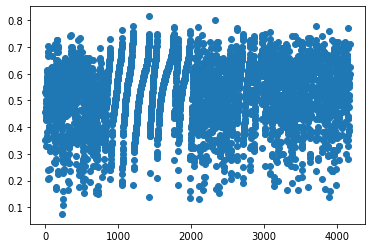

In [ ]:
plt.scatter(df.index,df['Length'])
plt.show

Histograms

(array([   7.,   60.,  147.,  304.,  460.,  778., 1051., 1017.,  324.,
          29.]),
 array([0.075, 0.149, 0.223, 0.297, 0.371, 0.445, 0.519, 0.593, 0.667,
        0.741, 0.815]),
 <a list of 10 Patch objects>)

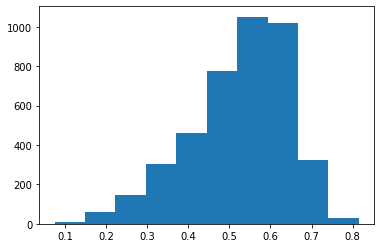

In [ ]:
plt.hist(df['Length'])

Density Plots

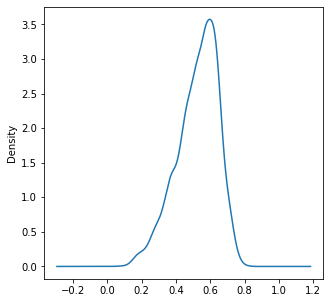

In [ ]:
plt.figure(figsize=(5,5))
df['Length'].plot(kind='density')

# ***Bi Variate***

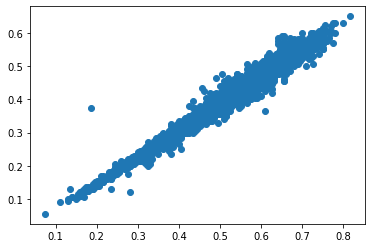

In [ ]:
plt.scatter(df.Length, df.Diameter)

Correlation Coefficients

In [ ]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Simple Linear Regression

In [ ]:
import statsmodels.api as sm
y = df['Diameter']
x = df[['Length']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Diameter   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.552e+05
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:27:59   Log-Likelihood:                 11329.
No. Observations:                4177   AIC:                        -2.265e+04
Df Residuals:                    4175   BIC:                        -2.264e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0194      0.001    -17.444      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# ***Multi Variate***

Pair Plot

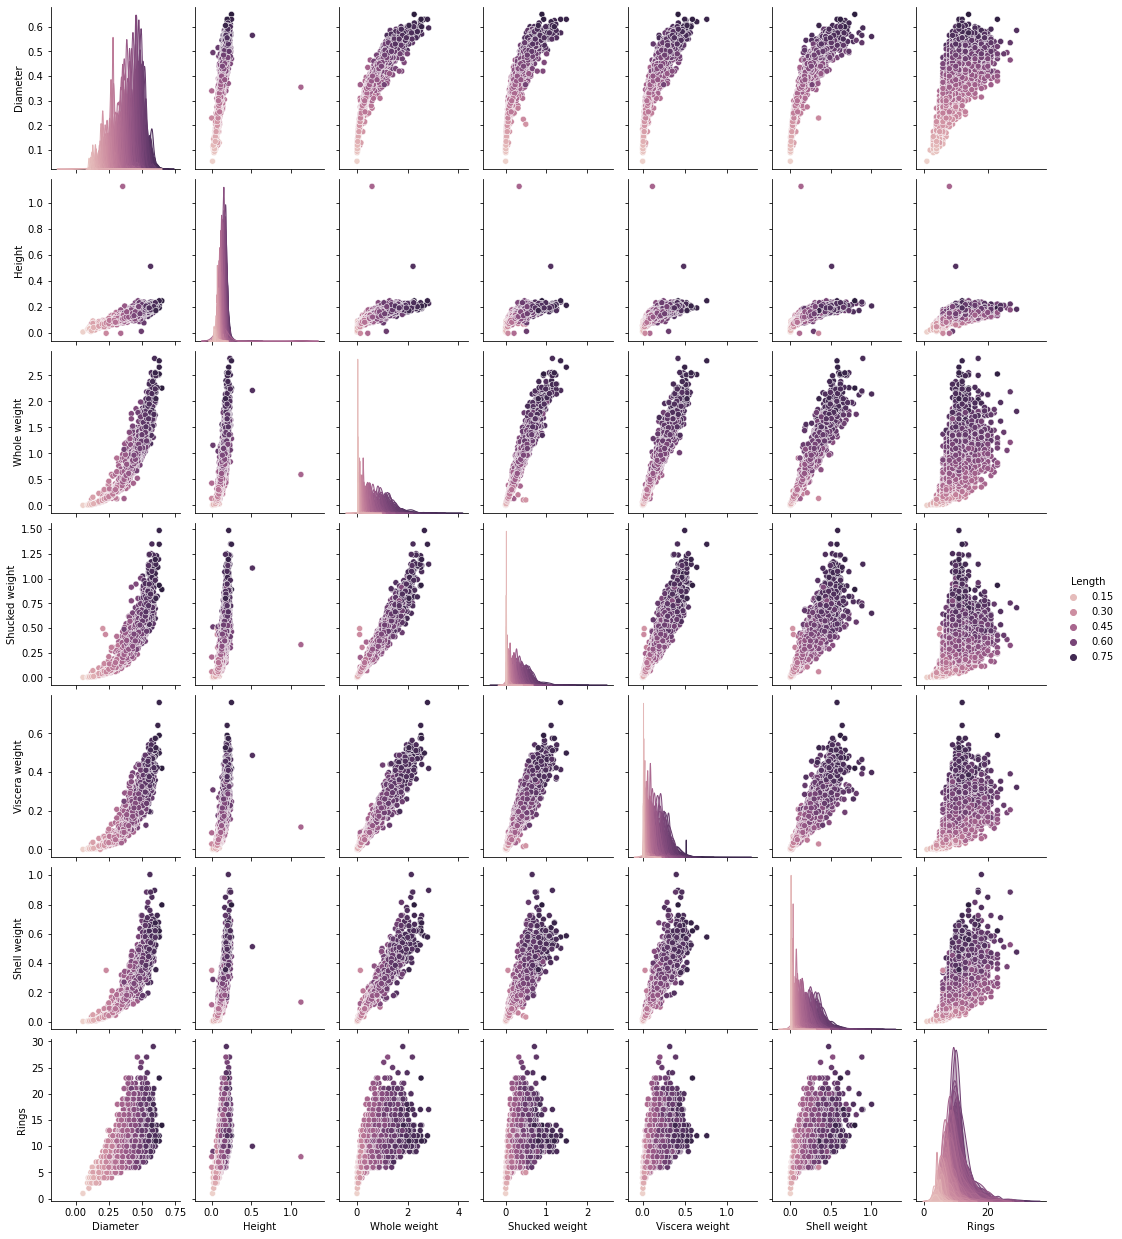

In [ ]:
sns.pairplot(
    data=df, 
    aspect=.85,
    hue='Length');

Line Plot

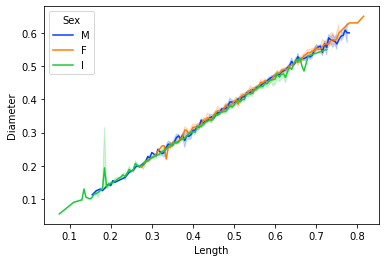

In [ ]:
sns.lineplot(
    x="Length", 
    y="Diameter",
    data=df,
    palette='bright',
    hue='Sex')

Point Plot

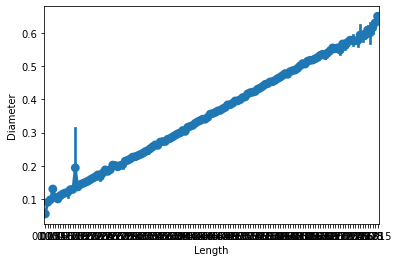

In [ ]:
sns.pointplot(
    x='Length', 
    y='Diameter', 
    data=df);

# ***Perform descriptive statistics on the dataset.***

Mean

In [ ]:
average = df['Viscera weight'].mean()
print(average)

0.1805936078525257


Median

In [ ]:
med = df['Shucked weight'].median()
print(med)

0.336


Standard Deviation

In [ ]:
standard_deviation = df['Whole weight'].std()
print(standard_deviation)

0.4903890182309977


Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


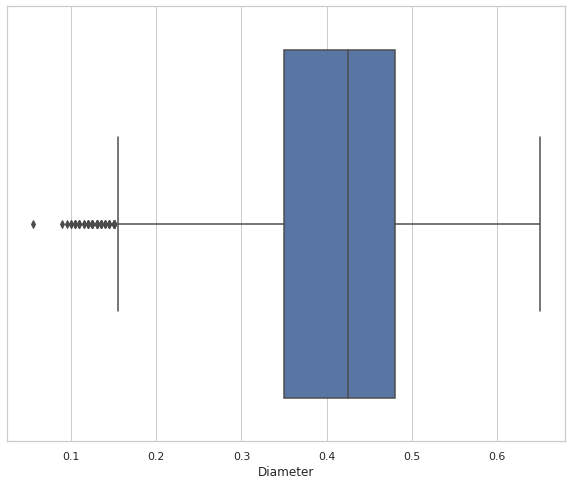

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Diameter', data=df, orient="v")

Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


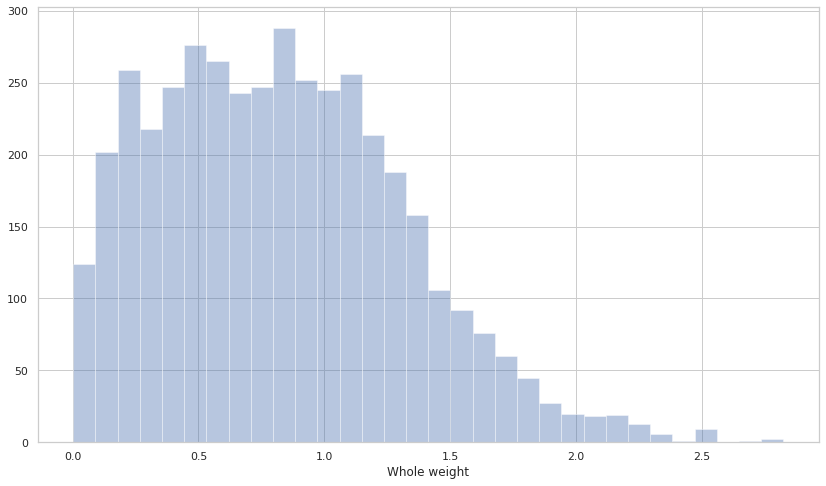

In [ ]:
filter_data = df.dropna(subset=['Whole weight'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['Whole weight'], kde=False)

Bar Chart

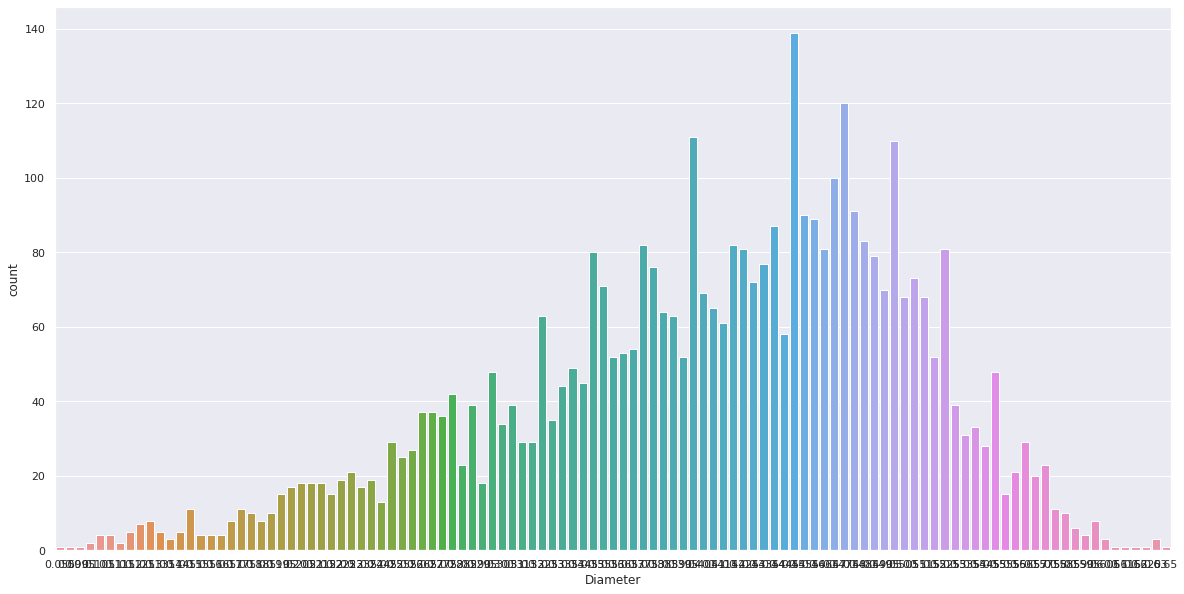

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Diameter', data=df)

# ***Check for Missing values and deal with them.***

In [ ]:
df.isnull().sum().sum()

0

Finding Outliers

In [ ]:
import plotly.express as px
df=pd.read_csv('abalone.csv')
df1= px.histogram(df, x='Whole weight')
df1.show()

Replacing Outliers

In [ ]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper,
       df.mean(),
       np.where(
           df < lower,
           df.mean(),
           df
           )
       )
   return df

In [ ]:
df['Shucked weight'] = impute_outliers_IQR(df['Shucked weight'])
df.describe()['Shucked weight']

count    4177.000000
mean        0.350723
std         0.206293
min         0.001000
25%         0.186000
50%         0.336000
75%         0.494500
max         0.965500
Name: Shucked weight, dtype: float64

# ***Check for Categorical columns and perform encoding.***

In [ ]:
df_numeric = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight','Rings']]
df_categorical = df[['Sex']]

In [ ]:
df_numeric.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df_categorical.head()

,Sex
0,M
1,M
2,F
3,M
4,I


In [ ]:
print(df['Sex'].unique())

['M' 'F' 'I']


In [ ]:
from sklearn.preprocessing import LabelEncoder

m1 = LabelEncoder()

In [ ]:
m1.fit(df_categorical['Sex'])

LabelEncoder()

In [ ]:
m2 = m1.transform(df_categorical['Sex'])

In [ ]:
print("Before Encoding:", list(df_categorical['Sex'][-10:]))
print("After Encoding:", m2[-10:])
print("The inverse from the encoding result:", m1.inverse_transform(m2[-10:]))

Before Encoding: ['M', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'M']
After Encoding: [2 0 2 2 2 0 2 2 0 2]
The inverse from the encoding result: ['M' 'F' 'M' 'M' 'M' 'F' 'M' 'M' 'F' 'M']


# ***Split the data into dependent and independent variables.***

Spliting data into dependent variables

In [ ]:
Y = df.iloc[:, -1].values
print(Y)

[15  7  9 ...  9 10 12]


Spliting data into independent variables

In [ ]:
X = df.iloc[:, :-1].values
print(X)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


# ***Scale the independent variables***

In [ ]:
from sklearn import preprocessing
df= pd.read_csv('abalone.csv')
X_data = df.Height
target = df.Diameter
standard = preprocessing.scale(X_data)
print(standard)

[-1.06442415 -1.18397831 -0.10799087 ...  1.56576738  0.25067161
  1.32665906]


# ***Split the data into training and testing***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [ ]:
data1 = pd.read_csv('/content/abalone.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

In [ ]:
X_train

array([['F', 0.45, 0.38, ..., 0.25, 0.1915, 0.265],
       ['I', 0.255, 0.185, ..., 0.0305, 0.0165, 0.02],
       ['I', 0.575, 0.45, ..., 0.3375, 0.2115, 0.239],
       ...,
       ['M', 0.595, 0.45, ..., 0.463, 0.2065, 0.2535],
       ['F', 0.625, 0.49, ..., 0.477, 0.2365, 0.3185],
       ['I', 0.41, 0.325, ..., 0.1325, 0.075, 0.101]], dtype=object)

In [ ]:
y_train

array([23,  4, 11, ..., 10,  9,  8])

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(4177, 8) (3968, 8) (209, 8)


In [ ]:
print(Y.shape, y_train.shape, y_test.shape)

(4177,) (3968,) (209,)


# ***Build the model***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv("abalone.csv")

Understand the Data

In [ ]:
dataset.head(12)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [ ]:
dataset.shape

(4177, 9)

In [ ]:
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Prepare the Data for Supervised Machine Learning

In [ ]:
y = dataset["Length"]
X = dataset[["Diameter","Height"]]
X.head()

,Diameter,Height
0,0.365,0.095
1,0.265,0.090
2,0.420,0.135
3,0.365,0.125
4,0.255,0.080


In [ ]:
y.head()

0    0.455
1    0.350
2    0.530
3    0.440
4    0.330
Name: Length, dtype: float64

Build a Model

i. Split Into Training and Test Sets

In [ ]:
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
X_train

,Diameter,Height
4131,0.425,0.145
3204,0.530,0.185
2622,0.575,0.205
2114,0.095,0.035
1422,0.575,0.215
...,...,...
1372,0.475,0.165
919,0.310,0.090
2550,0.220,0.080
537,0.230,0.075


In [ ]:
X_test

,Diameter,Height
1157,0.470,0.165
1125,0.425,0.150
2053,0.345,0.110
3591,0.475,0.165
455,0.470,0.140
...,...,...
3150,0.505,0.165
3037,0.450,0.145
2050,0.350,0.130
1690,0.500,0.170


In [ ]:
y_train

4131    0.580
3204    0.665
2622    0.700
2114    0.130
1422    0.720
        ...  
1372    0.615
919     0.410
2550    0.280
537     0.290
1220    0.330
Name: Length, Length: 2798, dtype: float64

In [ ]:
y_test

1157    0.605
1125    0.550
2053    0.460
3591    0.650
455     0.575
        ...  
3150    0.655
3037    0.560
2050    0.450
1690    0.625
253     0.575
Name: Length, Length: 1379, dtype: float64

ii. Select an Algorithm

In [ ]:
model = DecisionTreeClassifier()

iii. Fit the Model to the Data

In [ ]:
model.fit(X_train.astype('int'), y_train.astype('int'))

DecisionTreeClassifier()

iv. Check the Model

In [ ]:
predictions = model.predict(X_train)
print(accuracy_score(y_train.astype('int'), predictions.astype('int')))

1.0


Evaluate the Model

i. Compute Accuracy Score

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(accuracy_score(y_test.astype('int'), predictions.astype('int')))

1.0


In [ ]:
df = X_test.copy()
df['Actual'] = y_test
df['Prediction'] = predictions
df

,Diameter,Height,Actual,Prediction
1157,0.470,0.165,0.605,0
1125,0.425,0.150,0.550,0
2053,0.345,0.110,0.460,0
3591,0.475,0.165,0.650,0
455,0.470,0.140,0.575,0
...,...,...,...,...
3150,0.505,0.165,0.655,0
3037,0.450,0.145,0.560,0
2050,0.350,0.130,0.450,0
1690,0.500,0.170,0.625,0


# ***Measure the performance using Metrics.***

Accuracy

In [ ]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
dataframe = pd.read_csv('abalone.csv')
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.956140350877193

Precision

In [ ]:
precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
precision_negative = metrics.precision_score(y_test, preds, pos_label=0)
precision_positive, precision_negative

(1.0, 0.935064935064935)

Confusion Matrix

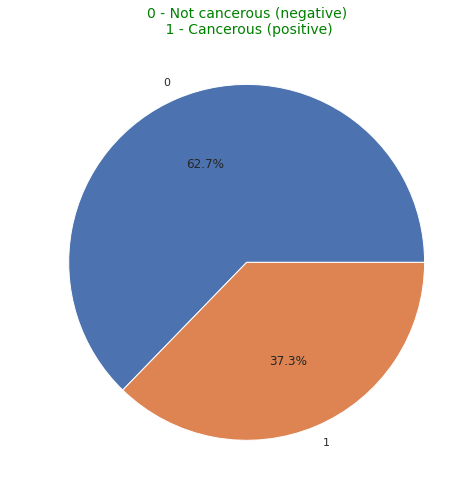

In [ ]:
plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Not cancerous (negative)\n 1 - Cancerous (positive)', size=14, c='green')
plt.tight_layout()
plt.show() 

Recall

In [ ]:
recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
recall_specificity = metrics.recall_score(y_test, preds, pos_label=0)
recall_sensitivity, recall_specificity

(0.8809523809523809, 1.0)